1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt

max_speeds = np.load('/Users/alicepagano/Documents/Università/Magistrale-1°anno/Laboratory of Computational Physics/Course/Laboratory/LaboratoryOfComputationalPhysics/max-speeds.npy')
years_nb = max_speeds.shape[0]

from scipy.interpolate import UnivariateSpline

max_speeds = np.sort(max_speeds)
cp = [ i/(years_nb+1) for i in range(0,years_nb) ]

speeds_cp = UnivariateSpline(cp, max_speeds)

xs = np.linspace(0, 1, years_nb)

plt.plot(max_speeds,cp,'o', markersize=6)
plt.plot(speeds_cp(xs), xs, '--', color='red', lw=2)
plt.xlabel('max speeds')
plt.ylabel('Cumulative distribution')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
fifty_prob = 1. - 0.02
fifty_wind = speeds_cp(fifty_prob)

print(fifty_wind)

34.63345579700954


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

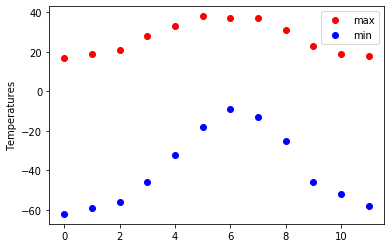

In [3]:
max_t = [ 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18 ]
min_t = [ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58 ]

plt.plot(max_t,'o', markersize=6, label='max', color = 'red')
plt.plot(min_t,'o', markersize=6, label='min', color = 'blue')
plt.xlabel('')
plt.ylabel('Temperatures')
plt.legend()
plt.show()

[ 52.64929246   6.72493739   2.15552753 -61.32093756]
[[ 1.96936392e+00 -9.52915355e-04  2.47841260e-02 -1.05130549e+00]
 [-9.52915355e-04  2.65209967e-03 -5.86181178e-05  1.19020371e-03]
 [ 2.47841260e-02 -5.86181178e-05  6.87067892e-03 -7.70750127e-02]
 [-1.05130549e+00  1.19020371e-03 -7.70750127e-02  1.41330964e+00]]
[23.09208734  6.25725421  2.50302107 15.77931811]
[[ 1.32861165e+00 -1.74981196e-03  1.10694966e-01 -1.08332769e+00]
 [-1.74981196e-03  7.51550891e-03 -2.52539119e-04  2.09040404e-03]
 [ 1.10694966e-01 -2.52539119e-04  3.27780617e-02 -1.86462254e-01]
 [-1.08332769e+00  2.09040404e-03 -1.86462254e-01  1.38424139e+00]]


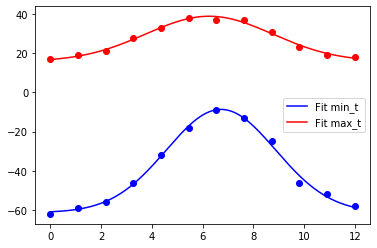

In [4]:
from scipy import optimize

def gaussian(x, c, mu, sig, b):
    return c*np.exp( -np.power(x - mu, 2.) / (2 * np.power(sig, 2.) ) ) + b

x_data = np.linspace(0, 12, num=12)
x = np.arange(0,12,0.01)

#min_t
y_data = min_t
min_params, min_params_covariance = optimize.curve_fit(gaussian, x_data, y_data, p0=[60,6.5, 1,-60])
print(min_params)
print (min_params_covariance)

plt.plot(x_data, y_data, 'o', color = 'blue')

plt.plot(x, gaussian(x, *min_params), color = 'blue',
         label='Fit min_t')

#min_t
y_data = max_t
max_params, max_params_covariance = optimize.curve_fit(gaussian, x_data, y_data, p0=[30,6.5, 1,20])
print(max_params)
print (max_params_covariance)

plt.plot(x_data, y_data, 'o', color = 'red')

plt.plot(x, gaussian(x, *max_params), color = 'red' ,
         label='Fit max_t')

plt.legend(loc='best')

Looking at the plots, the fits seem reasonable. Let us print the distance between the centroids. We see that there is a time offset for min and max temperatures within the fit accuracy.

In [5]:
print(min_params[1] - max_params[1])

0.46768318088611416


3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


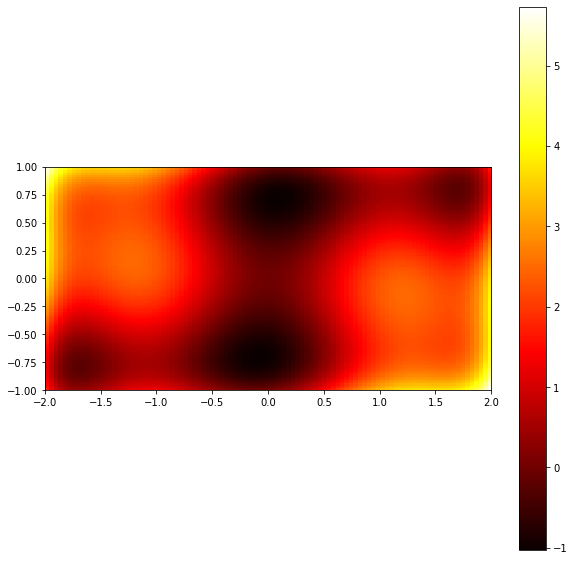

In [6]:
from matplotlib import pylab

def camelback(params):
    x = params[0]
    y = params[1]
    return (4 - 2.1 * np.power(x,2) + np.power(x,4)/3 ) * np.power(x,2) + x*y + ( 4 * np.power(y,2) - 4 ) * np.power(y,2)

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

fig = plt.figure(figsize = (10, 10))

xx, yy = np.meshgrid(x, y, sparse=True)
im = plt.imshow(camelback([xx,yy]), cmap='hot', extent= [-2,2,-1,1])
plt.colorbar(im, orientation='vertical')
plt.show()

In [7]:
initial_guess = [[0.0,-0.75],[0.0,0.75],[0.,0.]]
result = optimize.minimize(camelback, initial_guess)
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

global_min = result.fun  
print(global_min)

print(camelback([0,0]))

[ 0.08984201 -0.71265642  0.          0.75        0.          0.        ]
-1.0316284534898743
0.0


For an initial guess of [0,0], the minima values found for x and y are [0,0]. The function also assume this value. 

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

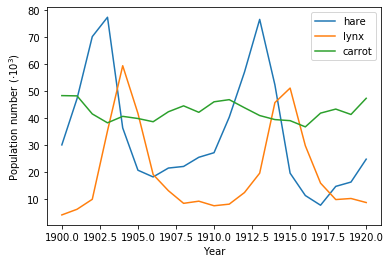

In [8]:
data = np.loadtxt('/Users/alicepagano/Documents/Università/Magistrale-1°anno/Laboratory of Computational Physics/Course/Laboratory/LaboratoryOfComputationalPhysics/populations.txt')
years = data[:, 0]
populations = data[:, 1:]
hares = data[:,1]
lynxes = data[:,2]

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

/Users/alicepagano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/alicepagano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


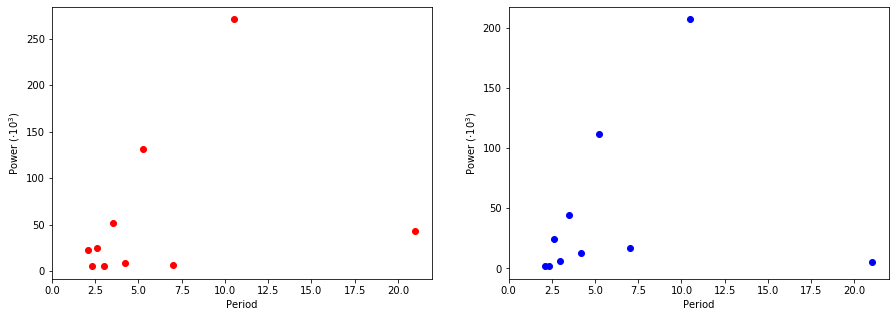

In [9]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

ft_hares = fftpack.fft(hares, axis=0)
ft_lynxes = fftpack.fft(lynxes, axis=0)

freq_hares = fftpack.fftfreq(hares.shape[0], years[1] - years[0])
freq_lynxes = fftpack.fftfreq(lynxes.shape[0], years[1] - years[0])

periods_hares = 1 / freq_hares
periods_lynxes = 1 / freq_lynxes

fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(periods_hares, abs(ft_hares) * 1e-3, 'o', color= 'red')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.subplot(1,2,2)
plt.plot(periods_lynxes, abs(ft_lynxes) * 1e-3, 'o', color= 'blue')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Text(0.5, 1.0, 'Original image')

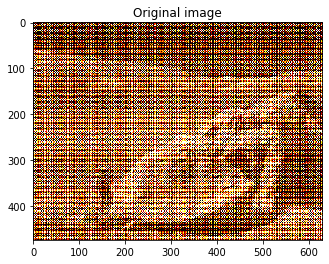

In [10]:
im = plt.imread('/Users/alicepagano/Documents/Università/Magistrale-1°anno/Laboratory of Computational Physics/Course/Laboratory/LaboratoryOfComputationalPhysics/moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.hot)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

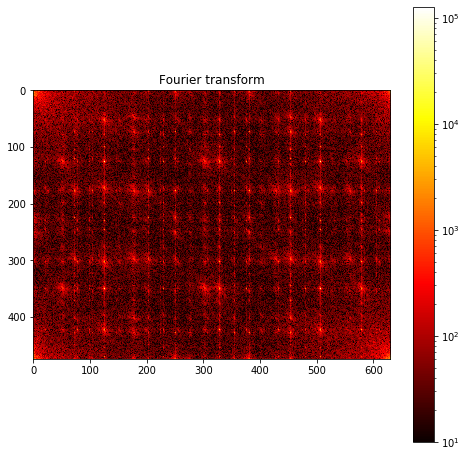

In [11]:
from scipy import fftpack
from matplotlib.colors import LogNorm

im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=10), cmap='hot')
    plt.colorbar(orientation='vertical')

fig = plt.figure( figsize = (8,8) )
plot_spectrum(im_fft)
plt.title('Fourier transform')

You have to use the logarithmic colormap, because the difference are very little such that you cannot visualize them without using a logarithmic scale.

Text(0.5, 1.0, 'Filtered Spectrum')

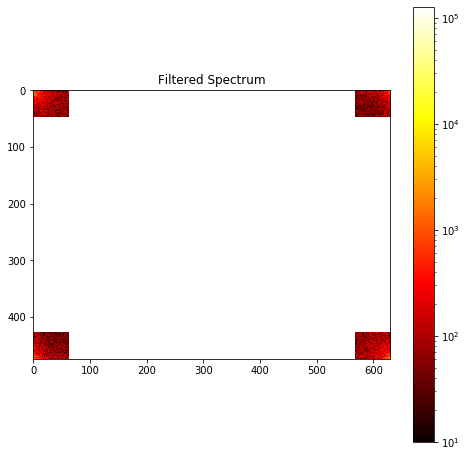

In [12]:
# In the lines following, we truncate coefficients. Indeed, we select the frequencies in the middle that are expected to be the more uniform one.

# Define the fraction of coefficients we keep
keep_fraction = 0.1

im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows and colums with indices between r*keep_fraction and r*(1-keep_fraction):
#ROWS
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
#COLUMNS
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

fig = plt.figure( figsize = (8,8) )
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

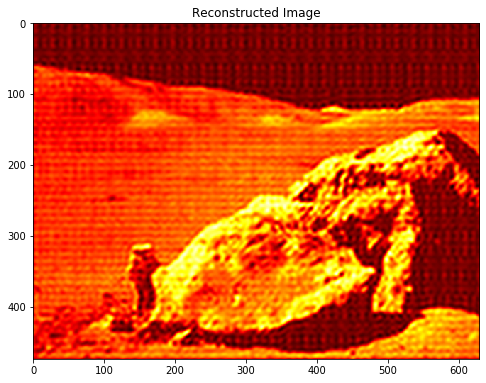

In [13]:
# Reconstruct the denoised image from the filtered spectrum, keep only the real part for display.
im_new = fftpack.ifft2(im_fft2).real

fig = plt.figure( figsize = (8,8) )
plt.imshow(im_new, plt.cm.hot)
plt.title('Reconstructed Image')